# AccelerateAI : Clustering

## Clustering with Categorical data - using KModes

KModes Clustering will be used to cluster categorical data.

KMeans uses mathematical measures (distance) to cluster continuous data as we have noticed. The lesser the distance, the more similar our data points are. Centroids are updated by Means. However, for categorical data points, we cannot calculate the distance in that fashion. Hence we go for KModes algorithm. It uses the dissimilarities(total mismatches) between the data points. The lesser the dissimilarities the more similar our data points are. It uses Modes instead of means.

You can refer https://pypi.org/project/kmodes/ for more details regarding python implementations of the k-modes and k-prototypes clustering algorithms for clustering categorical data.

Here we will taking a simple use case to demonstrate Kmodes.

### Use case Context - Segmenting customers for styling ideas

Context:

We have a dataset that has the information about hair color, eye color, and skin color of customers that come to a wellness setup. We aim to group them based on the available information and the management aims to suggest some styling ideas to them for further up-sell opportunities.

### Import Libraries & Load sample dataset

In [1]:
import pandas as pd
import numpy as np

# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initialize list of lists from wellness setup
data = [['C101001','blonde','brown','fair'], ['C102001','brunette','gray','brown'], ['C103001','red','green','brown'],
        ['C104001','black','hazel','medium'], ['C105001','brunette','amber','fair'], ['C106001','black','blue','brown'],
        ['C107001','red','green','fair'], ['C108001','black','hazel','medium']]
  
# Create the Pandas DataFrame
df = pd.DataFrame(data, columns=['Customer', 'hair_color','eye_color','skin_color'])

In [3]:
df

,Customer,hair_color,eye_color,skin_color
0,C101001,blonde,brown,fair
1,C102001,brunette,gray,brown
2,C103001,red,green,brown
3,C104001,black,hazel,medium
4,C105001,brunette,amber,fair
5,C106001,black,blue,brown
6,C107001,red,green,fair
7,C108001,black,hazel,medium


### Define No of clusters K

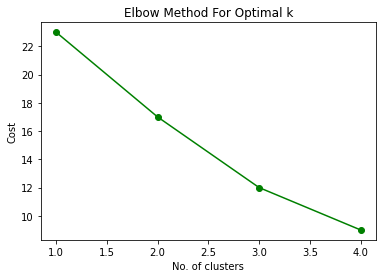

In [4]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=0) # We can set verbose 1 to get details
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'go-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see the optimum no. of cluster is at K=3 in the above graph.

### KModes clustering

In [5]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=0) # We can set verbose 1 to get details
clusters = kmode.fit_predict(df)
clusters

array([0, 0, 0, 1, 0, 2, 0, 1], dtype=uint16)

Let's add the predicted cluster values in our dataset

In [6]:
df.insert(0, "Cluster", clusters, True)
df

,Cluster,Customer,hair_color,eye_color,skin_color
0,0,C101001,blonde,brown,fair
1,0,C102001,brunette,gray,brown
2,0,C103001,red,green,brown
3,1,C104001,black,hazel,medium
4,0,C105001,brunette,amber,fair
5,2,C106001,black,blue,brown
6,0,C107001,red,green,fair
7,1,C108001,black,hazel,medium


That's all.

This is how Clusters (0 or 1 or 2) are allocated to every record.